# PCA(Principal Component Analysis):

In [1]:
#imporing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('mnist.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l=data['label']
d=data.drop('label',axis=1)

In [5]:
#describe statistical data about features
d.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
#give the feature data type
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [7]:
#give shape of dataset
d.shape

(42000, 784)

In [8]:
from sklearn.model_selection import train_test_split
d_train,d_test,l_train,l_test=train_test_split(d,l,test_size=0.3,random_state=42)

In [9]:
d_train.shape

(29400, 784)

In [10]:
d_test.shape

(12600, 784)

In [11]:
l_train.shape

(29400,)

In [12]:
l_test.shape

(12600,)

In [13]:
idx=30
img_grid=d.iloc[idx].values.reshape(28,28)

8


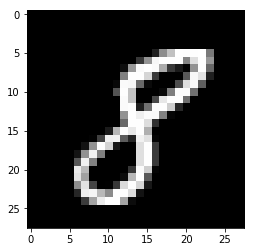

In [14]:
plt.imshow(img_grid,cmap='gray')
print(l[idx])
plt.show()

In [85]:
from sklearn.decomposition import PCA
#Make an instance of PCA
pca=PCA(.95)
#Reduce the dimensionality of your data
low_dim_d=pca.fit_transform(d)
pca.n_components_

154


The idea with going from 784 components to 311 is to reduce the running time of a supervised learning algorithm (in this case logistic regression) which we will see at the end of the tutorial. One of the cool things about PCA is that we can go from a compressed representation (311 components) back to an approximation of the original high dimensional data (784 components).



In [86]:
approximation=pca.inverse_transform(low_dim_d)
approximation.shape

(42000, 784)

Text(0.5, 1.0, '95% of explained variance')

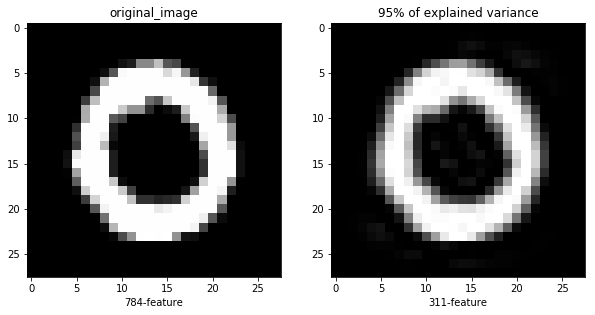

In [87]:
plt.figure(figsize=(10,12))
#original image
plt.subplot(1,2,1)
plt.imshow(d.iloc[1].values.reshape(28,28),
          cmap=plt.cm.gray,interpolation='nearest',clim=(0,255))
plt.xlabel('784-feature')
plt.title('original_image')
#311 dimension image
plt.subplot(1,2,2)
plt.imshow(approximation[1].reshape(28,28),
          cmap=plt.cm.gray,interpolation='nearest',clim=(0,255))
plt.xlabel('311-feature')
plt.title('95% of explained variance')

# Standardize The Data:

PCA is effected by scale so we need to scale the features in the data before applying PCA.(i.e mean=0,variance=1) StandardScaler helps standardize the dataset’s features.

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit on training set only
scaler.fit(d_train)
#tranform on both test and training sets
d_train=scaler.transform(d_train)
d_test=scaler.transform(d_test)
#Fit PCA on training set.
t=pca.fit(d_train)
print(t)
d_test_low=pca.transform(d_test)
d_train_low=pca.transform(d_train)
print(d_test_low.shape)
print(d_train_low.shape)
print(sum(pca.explained_variance_ratio_) )


PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
(12600, 311)
(29400, 311)
0.9500569682602955


# Apply Logistic Regression to the Transformed Data

In [77]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
#Model is learning the relationship between digits and labels
logisticRegr.fit(d_train,l_train)
# Predict for One Observation (image)
one=logisticRegr.predict(d_test[0].reshape(1,-1))
print(one)
# Predict for multiple Observation (image)
multi=logisticRegr.predict(d_test[0:10])
print(multi)

c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c

[8]
[8 1 9 9 8 6 2 2 7 1]


c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Measuring Model Performance

In [81]:
logisticRegr.score(d_test, l_test)

0.9094444444444445